# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# в веб версии отсутвует по умолчанию библиотека phik
# скачаем её
!pip install phik

In [2]:
# загружаю библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import phik
from phik.report import plot_correlation_matrix

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, \
    precision_score, recall_score, confusion_matrix, \
    mean_squared_error, roc_auc_score, roc_curve

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [3]:
#Импортирую датасет
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('Churn.csv')

In [4]:
# проверяю корректность открытия датасета
display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

In [6]:
# изучаю базовую статистику каждого столбца
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# поиск коррелирующих друг с другом столбцов
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Т.к. в датасете присутствует большое количество категориальных переменных применим метрику Phik (φk) корреляции. 
Данный метод последовательно работает между категориальными, порядковыми и интервальными переменными, фиксирует нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных. 

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


D:\Anaconda\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2932. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


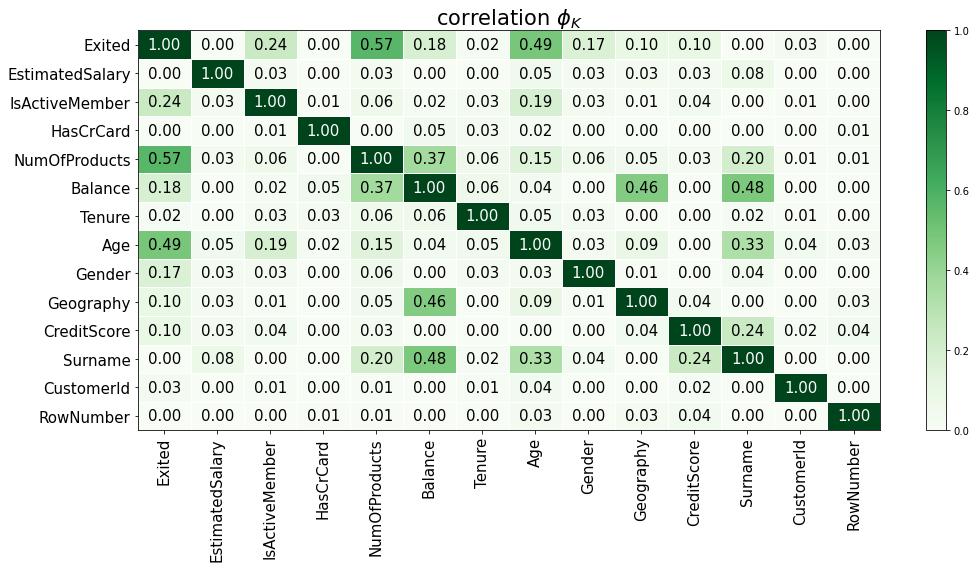

In [8]:
# построение матрици корреляции
phik_overview = data.phik_matrix()


plot_correlation_matrix(phik_overview.values.round(2), 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()


In [9]:
# просмотр пропущенных значений
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.000000
Balance,0.000000
NumOfProducts,0.000000


Значения с пропусками составляют 9% от вссего датасета. Необходимо заполнить пропуски медианными значениями. Предпологаю, что чем дольше клиент пользуется банком, тем больше у него банковских услуг. Решено заполнить колонку Tenure в зависимости от принадлежности клиента к той или иной группе по NumOfProducts.

In [10]:
# изучение данных с пропусками
display(data[data['Tenure'].isna()])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [11]:
# поиск медианного значения в зависимости от кол-ва банковских услуг
for i in data['NumOfProducts'].unique():
    data.loc[(data['NumOfProducts'] == i) & (data['Tenure'].isna()), 'Tenure'] = \
    data.loc[(data['NumOfProducts'] == i), 'Tenure'].median()


In [12]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

**Вывод:** В датасете 10 000 значений. Были обнаружены пропуски в размере 9% от всего датасета. Пропуски были заменены медианными значениями.

## Исследование задачи

0    0.7963
1    0.2037
Name: Exited, dtype: float64


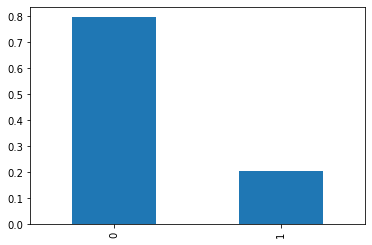

In [13]:
#изучение дисбаланса в целевом показателе
class_frequency = data['Exited'].value_counts(normalize= True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

In [14]:
# применим технику OHE для кодирования данных типа obj

data_ohe = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data_ohe = pd.get_dummies(data_ohe, drop_first=True)

Решил удалить из обучающего датасета колонки 'RowNumber', 'CustomerId' и все колонки с 'Surname', сформировавшиеся после применениия техники OHE, т.к. считаю что данные показатели будут перегружать модель и её искажать.

In [15]:
display(data_ohe.head(5))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
# деление датасета

target = data_ohe['Exited']
features = data_ohe.drop(['Exited'], axis = 1)

In [17]:
# проверяю корректность кодировки
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


In [18]:
#Дробление датасета на 3 выборки
features_train, X_rem, target_train, y_rem = train_test_split(
    features, target, train_size=0.60, random_state = 12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    X_rem, y_rem, test_size=0.50, random_state = 12345)


In [19]:
#Просмотр размеров выборок
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 654.4 KB


In [21]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6.0,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2.0,147435.96,1,0,0,187508.06,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4.0,0.00,2,0,1,25684.85,0,0,1
4094,513,29,10.0,0.00,2,0,1,25514.77,0,0,1
3492,655,45,5.0,57327.04,1,0,1,47349.00,0,0,0
2177,667,24,4.0,0.00,2,0,1,34335.55,0,0,0


In [22]:
# стандартизация данных

scaler = StandardScaler()

# стандартизируем щначения с числовым типом 
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

scaler.fit(features_train[numeric])



StandardScaler()

In [23]:
# стандартизация выборок 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


In [24]:
%%time
# Модель дерева решений

f1_best = 0
best_depth_tree = 0

#Цикл для поиска лучшей модели
for depth in range(1, 16): 
    model = DecisionTreeClassifier(max_depth=depth,
                                   random_state = 12345)
    model.fit(features_train, target_train) #Обучение

    predict_valid = model.predict(features_valid) #Предсказание
    f1 = f1_score(target_valid, predict_valid)   #Оценка f1
        
    #Сохранение параметров лучшей модели 
    if f1 > f1_best:
        
        best_depth_tree = depth
        f1_best = f1
            
print('Лучшая глубина дерева:', best_depth_tree)
print('Лучшая метрика f1:', f1_best)

Лучшая глубина дерева: 6
Лучшая метрика f1: 0.5696969696969697
CPU times: total: 266 ms
Wall time: 257 ms


In [25]:
%%time
# Модель случайный лес

f1_best = 0
best_est = 0
best_depth = 0

#Цикл для поиска лучшей модели
for est in range(10, 101, 10):
    for depth in range (1, 16):
        model = RandomForestClassifier(random_state=12345,
                                       n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) #Обучение
        
        
        predict_valid = model.predict(features_valid) #Предсказани
        f1 = f1_score(target_valid, predict_valid)   #Оценка f1

        #Сохранение параметров лучшей модели 
        if f1 > f1_best:

            f1_best = f1
            best_est = est
            best_depth = depth


print('Лучшая глубина дерева:', best_depth)
print('Кол-во листьев лучшей модели:', best_est)
print('Лучшая метрика f1:', f1_best)
               

Лучшая глубина дерева: 12
Кол-во листьев лучшей модели: 90
Лучшая метрика f1: 0.5896656534954408
CPU times: total: 33.1 s
Wall time: 33.1 s


In [26]:
%%time
# Логическая регрессия


best_iter = 0
f1_best = 0


#Цикл для поиска лучшей модели
for iters in range (100, 2000, 100):

    model = LogisticRegression(random_state = 12345, 
                               solver='liblinear', max_iter = iters)        
    model.fit(features_train, target_train) #Обучение 
    
    predict_valid = model.predict(features_valid) #Предсказание 
    f1 = f1_score(target_valid, predict_valid)   #Оценка f1

    #Сохранение параметров лучшей модели 
    if f1 > f1_best:
        
        f1_best = f1
        best_iter = iters 
    
        
print('Лучшее кол-во итераций:', best_iter)
print('Лучшая метрика f1:', f1_best)



Лучшее кол-во итераций: 100
Лучшая метрика f1: 0.33108108108108103
CPU times: total: 812 ms
Wall time: 224 ms


In [27]:
def metrixs(features, target, predict, model):
    '''исследование метрики при использовании оптимальной модели МО'''
   
    #Исследование точности модели     
    precision = precision_score(target, predict)

    # Исследование полноты модели
    recall = recall_score(target, predict)

    #  f1 метрика
    f1 = f1_score(target, predict)
    
    #   auc_roc метрика
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    
    auc_roc = roc_auc_score(target, probabilities_one) 
    
    # матрица ошибок 
    conf_matrix = confusion_matrix(target, predict)
    
    
    print("Полнота:", recall)
    print("Точность:", precision)
    print("F1-мера:", f1)
    print("auc_roc:", auc_roc)
    print('Матрица ошибок:','\n', conf_matrix)



In [28]:
%%time
# исследование метрики при использовании оптимальной  модели дерева решений

model = DecisionTreeClassifier(max_depth = best_depth_tree,
                               random_state = 12345)

model.fit(features_train, target_train)
predict_valid = model.predict(features_valid) #Предсказание
metrixs(features_valid, target_valid, predict_valid, model)
 

Полнота: 0.44976076555023925
Точность: 0.7768595041322314
F1-мера: 0.5696969696969697
auc_roc: 0.8164631712023421
Матрица ошибок: 
 [[1528   54]
 [ 230  188]]
CPU times: total: 156 ms
Wall time: 49.9 ms


In [29]:
%%time
# исследование метрики при использовании оптимальной модели случайного леса

model = RandomForestClassifier(random_state=12345, 
                               n_estimators=best_est, max_depth= best_depth)

model.fit(features_train, target_train) #Обучение

predict_valid = model.predict(features_valid) #Предсказани

metrixs(features_valid, target_valid, predict_valid, model)

Полнота: 0.46411483253588515
Точность: 0.8083333333333333
F1-мера: 0.5896656534954408
auc_roc: 0.8483976433440803
Матрица ошибок: 
 [[1536   46]
 [ 224  194]]
CPU times: total: 828 ms
Wall time: 513 ms


In [30]:
%%time
# исследование метрики при использовании оптимальной модели логической регрессии

model = LogisticRegression(random_state = 12345, 
                           solver='liblinear', max_iter = best_iter)        

model.fit(features_train, target_train) #Обучение 

predict_valid= model.predict(features_valid) #Предсказани
metrixs(features_valid, target_valid, predict_valid,  model)

Полнота: 0.23444976076555024
Точность: 0.5632183908045977
F1-мера: 0.33108108108108103
auc_roc: 0.7587588238496482
Матрица ошибок: 
 [[1506   76]
 [ 320   98]]
CPU times: total: 78.1 ms
Wall time: 27.9 ms


**Вывод:** Большенство моделей по матрице ошибок тяготеют к False Negative ответу в предсказаниях. Самая высокая оценка f1 наблюдается у модели "Случайный лес" - 0.5896. Самая низка, у логической регрессии - 0.331.

## Борьба с дисбалансом

Для борьбы с дисбалансом создадим 2 функции по увелечению и уменьшению выборки.
Т.к. лучшая метрика по f1 без учета дисбаланса классво наблюдается у модели "Дерево решений", то дальнейшее исследования будет проводится именно на данной модели МО.

In [31]:
def upsample(features, target, repeat):
    """Увелечение выборки в х раз"""
    
    features_zeros = pd.DataFrame(features[target == 0], index = None)
    features_ones = pd.DataFrame(features[target == 1], index = None)
    target_zeros = pd.Series(target[target == 0], index = None)
    target_ones = pd.Series(target[target == 1], index = None)

    features_upsampled = pd.concat(
        [features_zeros] + [features_ones] * repeat)
    
    target_upsampled = pd.concat(
        [target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

In [32]:
def downsample(features, target, fraction):
    """Уменьшение выборки в х раз"""
    
    features_zeros = pd.DataFrame(features[target == 0], index = None)
    features_ones = pd.DataFrame(features[target == 1], index = None)
    target_zeros = pd.Series(target[target == 0], index = None)
    target_ones = pd.Series(target[target == 1], index = None)

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    
    return features_downsampled, target_downsampled



In [33]:
%%time
# Модель дерева решений. 
# Устранение дисбаланса при помощи весов классов

depth_weight = 0
auc_roc_weight = 0   
f1_weight = 0

#Цикл для поиска лучшей модели
for depth in range(1, 16): 
    model = DecisionTreeClassifier(max_depth=depth,
                                   random_state = 12345, 
                                   class_weight = 'balanced')
    
    model.fit(features_train, target_train) #Обучение

    #валидационная выборка
    predict_valid = model.predict(features_valid) #Предсказание
    
    f1 = f1_score(target_valid, predict_valid)  #Оценка предсказания   
    
    
    #Сохранение параметров лучшей модели 
    if f1 > f1_weight:
        
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        
        depth_weight = depth
        f1_weight = f1
        auc_roc_weight = roc_auc_score(target_valid, probabilities_one)
        conf_matrix_weight = confusion_matrix(target_valid, predict_valid)   
                            

CPU times: total: 594 ms
Wall time: 272 ms


In [34]:
%%time
# Модель дерева решений. 
# Устранение дисбаланса увелечением выборки

depth_up = 0
f1_up = 0
auc_roc_up = 0  
upsampe_best = 0

#Цикл для поиска лучшей модели
for depth in range(1, 16): 
    model = DecisionTreeClassifier(max_depth=depth,
                                   random_state = 12345)
    for i in range(0, 10):
        features_upsampled, target_upsampled = upsample(
            features_train, target_train, i)

        model.fit(features_upsampled, target_upsampled) #Обучение

        #валидационная выборка
        predict_valid = model.predict(features_valid) #Предсказание

        f1 = f1_score(target_valid, predict_valid)  #Оценка предсказания
         
    
        #Сохранение параметров лучшей модели 
        if f1 > f1_up:
            
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:, 1]
            
            depth_up = depth
            f1_up = f1
            upsampe_best = i
            auc_roc_up = roc_auc_score(target_valid, probabilities_one)  
            conf_matrix_up = confusion_matrix(target_valid, predict_valid) 
            

CPU times: total: 3.67 s
Wall time: 3.68 s


In [35]:
%%time
# Модель дерева решений. 
# Устранение дисбаланса уменьшением выборки

depth_down = 0
f1_down = 0
auc_roc_down = 0  
downsample_best = 0

#Цикл для поиска лучшей модели
for depth in range(1, 16): 
    model = DecisionTreeClassifier(max_depth=depth,
                                   random_state = 12345)
    
    for i in np.arange(0.1, 1, 0.1):
        features_downsampled, target_downsampled = downsample(
            features_train, target_train, i)
        
        model.fit(features_downsampled, target_downsampled) #Обучение

        #валидационная выборка
        predict_valid = model.predict(features_valid) #Предсказание

        f1 = f1_score(target_valid, predict_valid)  #Оценка предсказания
        
            
        #Сохранение параметров лучшей модели 
        if f1 > f1_down:
            
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:, 1]
            
            depth_down = depth
            f1_down = f1
            downsample_best = i
            auc_roc_down = roc_auc_score(target_valid, probabilities_one)  
            conf_matrix_down = confusion_matrix(target_valid, predict_valid) 
            


CPU times: total: 1.97 s
Wall time: 1.97 s


In [36]:
print('_____Дисбаланс - изменение весов классов_____')
print('Лучшая глубина дерева:', depth_weight)
print('Лучшая метрика f1:', f1_weight)
print('Лучшая метрика auc_roc:', auc_roc_weight)
print('Матрица ошибок:','\n', conf_matrix_weight)

_____Дисбаланс - изменение весов классов_____
Лучшая глубина дерева: 5
Лучшая метрика f1: 0.5963791267305644
Лучшая метрика auc_roc: 0.8310244134068074
Матрица ошибок: 
 [[1341  241]
 [ 138  280]]


In [37]:
print('_____Дисбаланс - увелечение выборки_____')
print('Лучшая глубина дерева:', depth_up)
print('Лучшая метрика f1:', f1_up)
print('Лучшая метрика auc_roc:', auc_roc_up)
print("Увелечение выборки в",upsampe_best , "раз")
print('Матрица ошибок:','\n', conf_matrix_up)

_____Дисбаланс - увелечение выборки_____
Лучшая глубина дерева: 6
Лучшая метрика f1: 0.5977961432506886
Лучшая метрика auc_roc: 0.8210565633714213
Увелечение выборки в 2 раз
Матрица ошибок: 
 [[1491   91]
 [ 201  217]]


In [38]:
print('_____Дисбаланс - уменьшение выборки_____')
print('Лучшая глубина дерева:', depth_down)
print('Лучшая метрика f1:', f1_down)
print('Лучшая метрика auc_roc:', auc_roc_down)
print("Уменьшение выборки в",downsample_best , "раз")
print('Матрица ошибок:','\n', conf_matrix_down)

_____Дисбаланс - уменьшение выборки_____
Лучшая глубина дерева: 8
Лучшая метрика f1: 0.5867665418227216
Лучшая метрика auc_roc: 0.793673897132211
Уменьшение выборки в 0.6 раз
Матрица ошибок: 
 [[1434  148]
 [ 183  235]]


In [39]:
%%time
# Модель случайный лес
# Устранение дисбаланса при помощи весов классов

depth_weight = 0
est_weight = 0
f1_weight = 0
auc_roc_weight = 0  

#Цикл для поиска лучшей модели
for est in range(10, 111, 10):
    for depth in range (1, 17):
        model = RandomForestClassifier(random_state=12345,
                                       n_estimators=est, max_depth=depth,
                                      class_weight = 'balanced')
        
        model.fit(features_downsampled, target_downsampled) #Обучение

        predict_valid = model.predict(features_valid) #Предсказани
        f1 = f1_score(target_valid, predict_valid)   #Оценка f1
        
        #Сохранение параметров лучшей модели 
        if f1 > f1_best:
                
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:, 1]
                
            f1_weight = f1
            est_weight = est
            depth_weight = depth
            auc_roc_weight = roc_auc_score(target_valid, probabilities_one) 
            conf_matrix_weight = confusion_matrix(target_valid, predict_valid)

CPU times: total: 44.5 s
Wall time: 44.6 s


In [40]:
%%time
# Модель случайный лес
# Устранение дисбаланса увелечением выборки

depth_up = 0
est_up = 0
f1_up = 0
auc_roc_up = 0  
upwnsample_best = 0

#Цикл для поиска лучшей модели
for est in range(10, 111, 10):
    for depth in range (1, 17):
        model = RandomForestClassifier(random_state=12345,
                                       n_estimators=est, max_depth=depth)
        for i in range(0, 10):
            features_upsampled, target_upsampled = upsample(
                features_train, target_train, i)
        
            model.fit(features_upsampled, target_upsampled) #Обучение

            predict_valid = model.predict(features_valid) #Предсказани
            f1 = f1_score(target_valid, predict_valid)   #Оценка f1

            #Сохранение параметров лучшей модели 
            if f1 > f1_best:
                
                probabilities = model.predict_proba(features_valid)
                probabilities_one = probabilities[:, 1]
                
                f1_up = f1
                est_up = est
                depth_up = depth
                auc_roc_up = roc_auc_score(target_valid, probabilities_one) 
                upwnsample_best = i
                conf_matrix_up = confusion_matrix(target_valid, predict_valid)
                
                

CPU times: total: 10min 17s
Wall time: 10min 19s


In [41]:
%%time
# Модель случайный лес
# Устранение дисбаланса уменьшением выборки

depth_down = 0
est_down = 0
f1_down = 0
auc_roc_down = 0  
downsample_best = 0

#Цикл для поиска лучшей модели
for est in range(10, 111, 10):
    for depth in range (1, 17):
        model = RandomForestClassifier(random_state=12345,
                                       n_estimators=est, max_depth=depth)
        for i in np.arange(0.1, 1, 0.1):
            features_downsampled, target_downsampled = downsample(
                features_train, target_train, i)
        
            model.fit(features_downsampled, target_downsampled) #Обучение


            predict_valid = model.predict(features_valid) #Предсказани
            f1 = f1_score(target_valid, predict_valid)   #Оценка f1

            #Сохранение параметров лучшей модели 
            if f1 > f1_best:
                
                probabilities = model.predict_proba(features_valid)
                probabilities_one = probabilities[:, 1]
                
                
                f1_down = f1
                est_down = est
                depth_down = depth
                auc_roc_down = roc_auc_score(target_valid, probabilities_one) 
                downsample_best = i
                conf_matrix_down = confusion_matrix(target_valid, predict_valid)


CPU times: total: 5min 29s
Wall time: 5min 37s


In [42]:
print('_____Дисбаланс - изменение весов классов_____')
print('Лучшая глубина дерева:', depth_weight)
print('Количество листьев:', est_weight)
print('Лучшая метрика f1:', f1_weight)
print('Лучшая метрика auc_roc:', auc_roc_weight)
print('Матрица ошибок:','\n', conf_matrix_weight)

_____Дисбаланс - изменение весов классов_____
Лучшая глубина дерева: 16
Количество листьев: 110
Лучшая метрика f1: 0.5988372093023256
Лучшая метрика auc_roc: 0.8436575650711654
Матрица ошибок: 
 [[1518   64]
 [ 212  206]]


In [43]:
print('_____Дисбаланс - увелечение выборки_____')
print('Лучшая глубина дерева:', depth_up)
print('Количество листьев:', est_up)
print('Лучшая метрика f1:', f1_up)
print('Лучшая метрика auc_roc:', auc_roc_up)
print("Увелечение выборки в",upwnsample_best , "раз")
print('Матрица ошибок:','\n', conf_matrix_up)

_____Дисбаланс - увелечение выборки_____
Лучшая глубина дерева: 16
Количество листьев: 110
Лучшая метрика f1: 0.6032138442521632
Лучшая метрика auc_roc: 0.8381076887714057
Увелечение выборки в 9 раз
Матрица ошибок: 
 [[1435  147]
 [ 174  244]]


In [44]:
print('_____Дисбаланс - уменьшение выборки_____')
print('Лучшая глубина дерева:', depth_down)
print('Количество листьев:', est_down)
print('Лучшая метрика f1:', f1_down)
print('Лучшая метрика auc_roc:', auc_roc_down)
print("Уменьшение выборки в",downsample_best , "раз")
print('Матрица ошибок:','\n', conf_matrix_down)

_____Дисбаланс - уменьшение выборки_____
Лучшая глубина дерева: 16
Количество листьев: 110
Лучшая метрика f1: 0.5889212827988337
Лучшая метрика auc_roc: 0.8402421984163948
Уменьшение выборки в 0.9 раз
Матрица ошибок: 
 [[1516   66]
 [ 216  202]]


In [45]:
%%time
# Логическая регрессия
# Устранение дисбаланса при помощи весов классов

iter_weight = 0
f1_weight = 0
auc_roc_weight = 0  

#Цикл для поиска лучшей модели
for iters in range (100, 2000, 100):

    model = LogisticRegression(random_state = 12345, 
                               solver='liblinear', max_iter = iters,
                              class_weight = 'balanced')
    
    model.fit(features_train, target_train) #Обучение 
    
    predict_valid = model.predict(features_valid) #Предсказание 
    f1 = f1_score(target_valid, predict_valid)   #Оценка f1
    
    #Сохранение параметров лучшей модели 
    if f1 > f1_weight:
        
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        
        f1_weight = f1
        iter_weight = iters

        auc_roc_weight = roc_auc_score(target_valid, probabilities_one) 
        conf_matrix_weight = confusion_matrix(target_valid, predict_valid)
        
        

CPU times: total: 828 ms
Wall time: 213 ms


In [46]:
%%time
# Логическая регрессия
# Устранение дисбаланса увелечением выборки

iter_up = 0
f1_up = 0
auc_roc_up = 0  
upsample_best = 0

#Цикл для поиска лучшей модели
for iters in range (100, 2000, 100):

    model = LogisticRegression(random_state = 12345, 
                               solver='liblinear', max_iter = iters)
    
    for i in range(1, 10):
        
        features_upsampled, target_upsampled = upsample(
                features_train, target_train, i)
        
        model.fit(features_upsampled, target_upsampled)
    

        predict_valid = model.predict(features_valid) #Предсказание 
        f1 = f1_score(target_valid, predict_valid)   #Оценка f1

        #Сохранение параметров лучшей модели 
        if f1 > f1_up:

            upsample_best = i

            f1_up = f1
            iter_up = iters 

            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:, 1]


            auc_roc_up = roc_auc_score(target_valid, probabilities_one) 
            conf_matrix_up = confusion_matrix(target_valid, predict_valid)

CPU times: total: 13 s
Wall time: 3.8 s


In [47]:
%%time
# Логическая регрессия
# Устранение дисбаланса уменьшением выборки
iter_down = 0
f1_down = 0
auc_roc_down = 0  
downsample_best = 0

#Цикл для поиска лучшей модели
for iters in range (100, 2000, 100):

    model = LogisticRegression(random_state = 12345, 
                               solver='liblinear', max_iter = iters)        
    
    for i in np.arange(0.1, 1, 0.1):
        features_downsampled, target_downsampled = downsample(
                features_train, target_train, i)
        
        model.fit(features_downsampled, target_downsampled) #Обучение

        predict_valid = model.predict(features_valid) #Предсказание 
        f1 = f1_score(target_valid, predict_valid)   #Оценка f1

        #Сохранение параметров лучшей модели 
        if f1 > f1_down:

            f1_down = f1
            iter_down = i 

            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:, 1]

            auc_roc_down = roc_auc_score(target_valid, probabilities_one) 
            conf_matrix_down = confusion_matrix(target_valid, predict_valid)



CPU times: total: 7.2 s
Wall time: 1.87 s


In [48]:
print('_____Дисбаланс - изменение весов классов_____')
print('Количество итераций:', iter_weight)
print('Лучшая метрика f1:', f1_weight)
print('Лучшая метрика auc_roc:', auc_roc_weight)
print('Матрица ошибок:','\n', conf_matrix_weight)

_____Дисбаланс - изменение весов классов_____
Количество итераций: 100
Лучшая метрика f1: 0.4888507718696398
Лучшая метрика auc_roc: 0.7636160997828441
Матрица ошибок: 
 [[1119  463]
 [ 133  285]]


In [49]:
print('_____Дисбаланс - увелечение выборки_____')
print('Лучшая глубина дерева:', depth_up)
print('Лучшая метрика f1:', f1_up)
print('Лучшая метрика auc_roc:', auc_roc_up)
print("Увелечение в", upwnsample_best)
print('Матрица ошибок:','\n', conf_matrix_up)

_____Дисбаланс - увелечение выборки_____
Лучшая глубина дерева: 16
Лучшая метрика f1: 0.5
Лучшая метрика auc_roc: 0.7626452494873547
Увелечение в 9
Матрица ошибок: 
 [[1250  332]
 [ 168  250]]


In [50]:
print('_____Дисбаланс - увелечение выборки_____')
print('Лучшая глубина дерева:', depth_down)
print('Лучшая метрика f1:', f1_down)
print('Лучшая метрика auc_roc:', auc_roc_down)
print("Увелечение в", downsample_best)
print('Матрица ошибок:','\n', conf_matrix_down)

_____Дисбаланс - увелечение выборки_____
Лучшая глубина дерева: 16
Лучшая метрика f1: 0.5043290043290043
Лучшая метрика auc_roc: 0.7624819288768987
Увелечение в 0
Матрица ошибок: 
 [[1309  273]
 [ 185  233]]


**Вывод:** Балансировка весов классов значительно увеличивает f1 оценку. Самым лучшим способом для борьбы с дисбалансом классов, для данной модели, является увелечение тренировочной выборки для обучения.

## Тестирование модели

Полнота: 0.5650118203309693
Точность: 0.6565934065934066
F1-мера: 0.6073697585768741
auc_roc: 0.8513374138584948
Матрица ошибок: 
 [[1452  125]
 [ 184  239]]


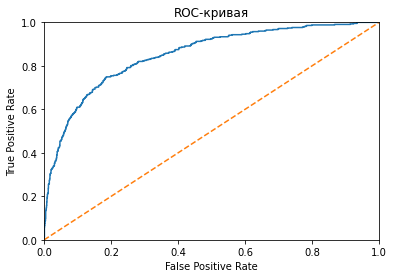

In [52]:
# создание модели с наилучшими параметрами
model = RandomForestClassifier(random_state=12345,
                                       n_estimators=110, max_depth=16,
                                      class_weight = 'balanced')

# увелечение выборки
features_upsampled, target_upsampled = upsample(
                features_train, target_train, 9)
        
model.fit(features_upsampled, target_upsampled)

predict_test= model.predict(features_test) #предсказание по тестовой выборке

# печать результатов метрик
metrixs(features_test, target_test, predict_test, model)

# запись результатов модели при изменении порогов положительного ответа
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

# построение графика модели
plt.step(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0,1], linestyle = '--')

plt.ylim([0, 1])
plt.xlim([0, 1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")

plt.show()




**Вывод:** Лучший результат f1 метрики для тестовой выборки с наилучшими параметрами модели составляет 0.6073. Показатель auc_roc составляет 0.85133.

<div style="border:solid steelgreen 4px; padding: 20px; border-radius: 15px">
<h1>Итог:</h1>

>В ходе работы были выполнены следующие операции:
>>- Изучена общая информация о представленном датасете
>>- Подготовка датасета для обучения моделей МО
>>- Исследованы результаты работы различных моделей без учета дисбаланса классов
>>- Исследованы результаты моделей с учетом дисбаланса классов
>>- Проверены показатели метрики выбранной модели на тестовой выборке
   

> В ходе исследования была выявлена самая лучшая модель для решения задачи классификации (разторгнет клиент договор с банком или нет) - "Случайный лес". Для достижение наилучших результатов предсказания данной модели, необходимо учесть в параметрах дисбаланс классов и увеличить обучающую выборку в 9 раз. Благодоря этому показатели F1-меры достигаю 0.6073 и auc_roc - 0.85133. 
    